In [55]:
# ^^^ pyforest auto-imports - don't write above this line
# !pip3 install librosa
# !pip3 install numbda
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav
import sys
import wave
from scipy.io.wavfile import read
from python_speech_features import delta 
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

# from features_extraction import mfcc_features
# from pncc import pncc
from sklearn.model_selection import train_test_split
# from sklearn.externals.six.moves import xrange
from sklearn.mixture import GaussianMixture as GMM
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dropout
from numpy import asarray
from numpy import save
from numpy import load
from keras import regularizers

Using TensorFlow backend.


In [4]:
DATA_RAW_DIR = '../data/ST-AEDS'

In [5]:
# Create the pandas DataFrame 
df = pd.DataFrame(columns = ['path', 'gender']) 

In [6]:
male_list = []
female_list = []
for filename in os.listdir(DATA_RAW_DIR):
    if filename.startswith("m"):
        male_list.append(os.path.join(DATA_RAW_DIR, filename))
    if filename.startswith("f"):
        female_list.append(os.path.join(DATA_RAW_DIR, filename))

In [7]:
for i in range(len(male_list)):
    df = df.append({'path' : male_list[i] , 'gender' : 'male'} , ignore_index=True)

In [8]:
for i in range(len(female_list)):
    df = df.append({'path' : female_list[i] , 'gender' : 'female'} , ignore_index=True)

In [9]:
df.head(7)

,path,gender
0,../data/ST-AEDS/m0005_us_m0005_00080.wav,male
1,../data/ST-AEDS/m0002_us_m0002_00351.wav,male
2,../data/ST-AEDS/m0002_us_m0002_00303.wav,male
3,../data/ST-AEDS/m0002_us_m0002_00106.wav,male
4,../data/ST-AEDS/m0005_us_m0005_00045.wav,male
5,../data/ST-AEDS/m0002_us_m0002_00110.wav,male
6,../data/ST-AEDS/m0001_us_m0001_00279.wav,male


In [10]:
le = LabelEncoder()
le.fit(df['gender'])
df['gender'] = le.transform(df['gender'])

In [11]:
df['mfcc'] = ''
df

,path,gender,mfcc
0,../data/ST-AEDS/m0005_us_m0005_00080.wav,1,
1,../data/ST-AEDS/m0002_us_m0002_00351.wav,1,
2,../data/ST-AEDS/m0002_us_m0002_00303.wav,1,
3,../data/ST-AEDS/m0002_us_m0002_00106.wav,1,
4,../data/ST-AEDS/m0005_us_m0005_00045.wav,1,
...,...,...,...
3837,../data/ST-AEDS/f0002_us_f0002_00210.wav,0,
3838,../data/ST-AEDS/f0003_us_f0003_00411.wav,0,
3839,../data/ST-AEDS/f0004_us_f0004_00387.wav,0,
3840,../data/ST-AEDS/f0004_us_f0004_00212.wav,0,


In [12]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav

def get_mfcc(filename):
    (rate,sig) = wav.read(filename)
    mfcc_feat = mfcc(sig,rate)
    fbank_feat = logfbank(sig,rate)
    return mfcc_feat

# print(fbank_feat[1:3,:])

In [13]:
for i in range(len(df['path'])):
    df['mfcc'][i]= get_mfcc(df['path'][i]) 

/home/akshat/Documents/GHrepos/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df.iloc[0,:]

path               ../data/ST-AEDS/m0005_us_m0005_00080.wav
gender                                                    1
mfcc      [[7.29667231638874, -20.16873242164923, 1.3844...
Name: 0, dtype: object

In [15]:
df.loc[0,'mfcc'].shape

(367, 13)

In [16]:
df['len'] = ''

In [17]:
for i in range(len(df['mfcc'])):
    df['len'][i] = len(df['mfcc'][i])

/home/akshat/Documents/GHrepos/envs/ml_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
df.head(1)['len']

0    367
Name: len, dtype: object

In [19]:
max_length = np.amax(df['len'])
print("Max length of MFCC is: ", str(max_length))

Max length of MFCC is:  999


In [20]:
zeros_array = np.zeros((max_length, 39))
# df['mfcc'][1] = np.append(df['mfcc'][1],data)
zeros_array.shape

(999, 39)

In [21]:
for i, row in df.iterrows():
    zeros_array[:row['mfcc'].shape[0], :row['mfcc'].shape[1]] = row['mfcc']
    df.at[i, 'mfcc'] = zeros_array

In [22]:
df.loc[1,'mfcc'].shape

(999, 39)

In [23]:
df['mfcc'] = df['mfcc'].apply(lambda x: x.ravel())

In [24]:
df.loc[0, 'mfcc']

array([  7.18724423, -23.97344368,  -4.62072468, ...,   0.        ,
         0.        ,   0.        ])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df['mfcc'], df['gender'], test_size=0.33, random_state=42)
print(len(X_train),len(y_train))

2574 2574


In [26]:
features = np.asarray(())
for i, vector in enumerate(X_train):
    if features.size == 0: 
        features = vector
    else:
        features = np.vstack((features, vector))


KeyboardInterrupt: 

In [108]:
features_test = np.asarray(())
for i, vector in enumerate(X_test):
    if features_test.size == 0: 
        features_test = vector
    else:
        features_test = np.vstack((features_test, vector))

In [27]:
features.shape

(828, 38961)

In [28]:
y_train = np.array(y_train)

In [29]:
y_train.shape

(2574,)

In [30]:
X_train = np.array(X_train)

In [31]:
y_train = np.array(y_train)

In [32]:
X_train[0][0]

7.187244234601645

In [33]:
X_train[0][0].shape

()

In [34]:
np.reshape(X_train[0],(1,38961)).shape

(1, 38961)

In [35]:
X_train

array([array([  7.18724423, -23.97344368,  -4.62072468, ...,   0.        ,
         0.        ,   0.        ]),
       array([  7.18724423, -23.97344368,  -4.62072468, ...,   0.        ,
         0.        ,   0.        ]),
       array([  7.18724423, -23.97344368,  -4.62072468, ...,   0.        ,
         0.        ,   0.        ]),
       ...,
       array([  7.18724423, -23.97344368,  -4.62072468, ...,   0.        ,
         0.        ,   0.        ]),
       array([  7.18724423, -23.97344368,  -4.62072468, ...,   0.        ,
         0.        ,   0.        ]),
       array([  7.18724423, -23.97344368,  -4.62072468, ...,   0.        ,
         0.        ,   0.        ])], dtype=object)

In [36]:
y_train = np.array(y_train)

In [37]:
y_train = y_train.reshape(-1,1)

In [38]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [39]:
np.array(X_train)[0].flatten().shape

(38961,)

In [40]:
X_train = np.array(X_train).flatten()
# print(np.array(X_train).flatten())

In [41]:
X_train[0].shape

(38961,)

In [42]:
X_train  = np.array(X_train).flatten

In [43]:
# X_train.shape
# y_train.shape

In [44]:
X_train

<function ndarray.flatten>

In [45]:
y_train

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

In [46]:
gmm_model = GaussianMixture(n_components=2).fit(features, y_train)

/home/akshat/Documents/GHrepos/envs/ml_env/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_


MemoryError: Unable to allocate 22.6 GiB for an array with shape (2, 38961, 38961) and data type float64

In [47]:
print(gmm_model.score(X_test[0]))

NameError: name 'gmm_model' is not defined

In [ ]:
print(accuracy_score(np.array(y_test), prediction))

In [ ]:
def wav_file_plot(wave_file_path):
    spf = wave.open(audio_file_path, "r")
    # Extract Raw Audio from Wav File
    signal = spf.readframes(-1)
    signal = np.fromstring(signal, "Int16")
    # If Stereo
    if spf.getnchannels() == 2:
        print("Just mono files")
        sys.exit(0)
    plt.figure(1)
    plt.title("Signal Wave...")
    plt.plot(signal)
    plt.show()

In [ ]:
path = "../data/external/st_american/m0005_us_m0005_00431.wav"
wav_file_plot(path)

In [ ]:
path = "../data/external/st_american/f0001_us_f0001_00002.wav"
wav_file_plot(path)

In [ ]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
(rate,sig) = wav.read("../data/external/st_american/m0005_us_m0005_00431.wav")
mfcc_feat = mfcc(sig,rate)

print(mfcc_feat)
plt.plot(mfcc_feat)
plt.show()

Gaussian Mixture Model for Gender Identification from Voice Samples

In [ ]:
df['new']=''

In [ ]:
from random import seed
from random import random
# seed random number generator
seed(1)
for i in range(len(df)):
    df['new'][i]=[random()]

In [ ]:
df.head()

In [75]:
wav, sr = librosa.load(df['path'][0])
print('sr:', sr)
print ('wav shape:', wav.shape)

sr: 22050
wav shape: (122598,)


In [77]:
length = wav.shape[0]/float(sr)
length

5.56

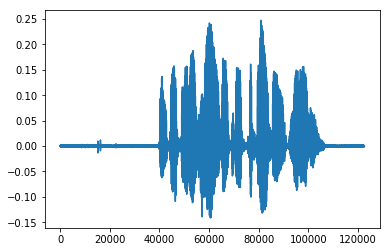

In [78]:
plt.plot(wav)

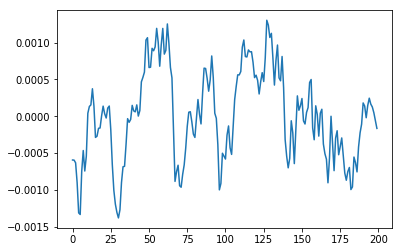

In [79]:
plt.plot(wav[4000:4200])

In [66]:
DATA_DIR = '../data/ST-AEDS'

In [67]:
# !pip3 install numba==0.48

import librosa

X = []
y = []

count = 1
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
for fname in os.listdir(DATA_DIR):
    struct = fname.split('_')
    print(struct)
    gender = struct[0]
    if gender[0] == 'f':
        gender = 0
    elif gender[0] == 'm':
        gender = 1
    wav, sr = librosa.load(DATA_DIR + fname)
    padded = pad(wav, 30000)
    X.append(padded)
    y.append(gender)
    count+=1
    print(count)
    
X = np.vstack(X)
y = np.array(y)
print('X:', X.shape)
print ('y:', y.shape)

AssertionError: 

In [60]:
len(X)

0

In [62]:
save('../data/processed/X.npy', X)
save('../data/processed/y.npy', y)

In [63]:
# load array
X = load('../data/processed/X.npy')
y = load('../data/processed/y.npy')
# print the array
print(X)
print(y)

[]
[]


In [64]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X[0].shape)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer = 'sgd', loss='binary_crossentropy', metrics = ['acc'])
model.summary()


# model = Sequential()
# model.add(Dense, input=(X[0].shape))
# # ip = Input(shape=(X[0].shape))
# model.add(Dense(128, activation='relu'))
# model.Dense(1, activation='sigmoid')
# # model = Model(input=ip, output=op)
# model.summary()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [59]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
history = model.fit(X,
          y,
          epochs=30,
          batch_size=8, validation_split=0.20)

AssertionError: 

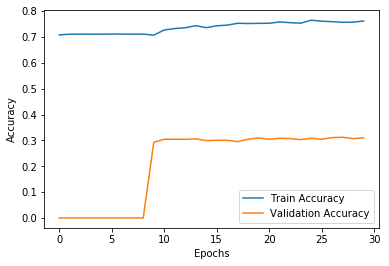

In [56]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


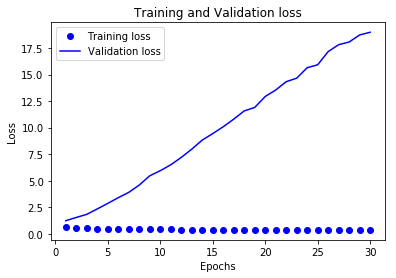

In [57]:
history_dict = history.history
print(history_dict.keys())
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

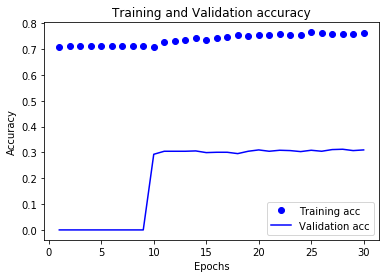

In [58]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def get_mfcc(audio_path):
        rate, audio  = read(audio_path)
        mfcc_feature = mfcc(audio, rate, winlen = 0.05, winstep = 0.01, numcep = 5, nfilt = 30, nfft = 800, appendEnergy = True)
        mfcc_feature  = preprocessing.scale(mfcc_feature)
        deltas        = delta(mfcc_feature, 2)
        double_deltas = delta(deltas, 2)
        combined      = np.hstack((mfcc_feature, deltas, double_deltas))
        return combined
audio_file_path = '../data/external/st_american/m0005_us_m0005_00431.wav'
len(get_mfcc(audio_file_path))
print(get_mfcc(audio_file_path))
for i in range(len(df['path'])):
    df['mfcc'][i] = get_mfcc(df['path'][i])